# Polar Code
Writer: Hosung Joo (zxcqa123@postech.ac.kr)

This document briefly describes how to polar-encode and polar-decode.

## Encoding: Channel Polarization

Consider 2-bit transmitting channel such that:
- one bit is transmitted without any process
- another bit is transmitted with <b>XOR</b> operation of two inputs of bits.

We call these channels are <i>polarized</i> as it transmits a single bit <b>twice</b>. Thus, the twice-transmitted bit is <i>repetively coded</i>, therefore, it is a good channel. Otherwise, it is a bad channel.
We may demonstrate such channel using this $G_{2}$ matrix.

$$G_{2} = \begin{bmatrix}1 & 0\\
1 & 1
\end{bmatrix}$$

Consider inputs $x = \begin{bmatrix}u_{0} & u_{1}\end{bmatrix}$.

Transmitting $y=x G_{2}$ gives the same as we discussed. See the example below.

In [1]:
import numpy as np

x1 = np.array([0, 0])
x2 = np.array([0, 1])
x3 = np.array([1, 0])
x4 = np.array([1, 1])

G2 = np.array([[1, 0],[1, 1]])

print("G2:")
print(G2)

print("x1G2:")
print(np.matmul(x1,G2))
print("x2G2:")
print(np.matmul(x2,G2))
print("x3G2:")
print(np.matmul(x3,G2))
print("x4G2:")
print(np.matmul(x4,G2))

G2:
[[1 0]
 [1 1]]
x1G2:
[0 0]
x2G2:
[1 1]
x3G2:
[1 0]
x4G2:
[2 1]


Meanwhile, we use 1 or 0 (bits) for the data. In actual, XOR operation for $x_{4}G_{2}$ was needed. The XOR operation can be implemented by adding the bits and then the (mod 2) operation. <b><i>The addition in mod 2</i></b> is the addition in Galois field of $GF(2)$.

<details>
    <summary>See little details of $GF(2)$. Click here.</summary>

### Little note on $GF(2)$:

- $GF(2) = \{K,+,\times\}$
- elements: $K=\{0,1\}$
- operations: $\{+,\times\}$

 - actual operation: $+$ is bitwise XOR($\oplus$), $\times$ is bitwise AND.
 $$\begin{equation} \label{GF2}
 \begin{split}
 0 + 0 = 0, & ~ 0 + 1 = 1, \\
 1 + 0 = 1, & ~ 1 + 1 = 0 \\
 & \\
 0 \times 0 = 0, & ~ 0 \times 1 = 0, \\
 1 \times 0 = 0, & ~ 1 \times 1 = 1 \\
 & \\
 Note: for ~ any ~ & x \in K, \\
 x + x = 0, & ~ thus, ~ -x = x \\
 x + 0 = x~ & \\
 x \times x = x, & ~ thus, ~ x^{-1} = x \\
 x \times 1 = x~&
 \end{split}
 \end{equation}$$
 - associativity: for any $x, y, z \in K$, $x+(y+z)=(x+y)+z$, $x\times(y\times z)=(x\times y)\times z)$
 - commutativity: for any $x, y \in K$, $x+y=y+x$, $x\times y=y\times x$
 - identity: $0$ for $+$, $1$ for $\times$. Note that $0$ or $1$ is $\in K$
 - inverse: <i>itself</i>
 - distributivity: for any $x, y, z \in K$, $x\times(y+z) = x\times y + x\times z$

Simply,
$x+y~(mod~2)$ is $x+y$ in $GF(2)$. So we use the 'mod 2' operation.
    
</details>

In [2]:
print("mod 2 of x4G2:")
print(np.matmul(x4,G2)%2)

mod 2 of x4G2:
[0 1]


This $G_{2}$ matrix is a one-to-one mapping for Galois field of $GF(2^{2})$. (Of course $G_{2}$ has the inverse.) Channel polarization is a linear-based process, thus, it is faster than the other complicated encoders. See the example below.

In [3]:
X = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]])

Y = np.matmul(X,G2)%2

print("X:")
print(X)
print("Y:")
print(Y)

X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Y:
[[0 0]
 [1 1]
 [1 0]
 [0 1]]


### Good Channel, Bad Channel

One may notice that the $u_{0}$ is the bad channel, and the $u_{1}$ is the good channel.

One may <b>not</b> use $u_{0}$ for the data transmission, but as a redundancy. (<i>i.e.</i> We call this as <i><b>Frozen Bit</b></i>.)

If we only use $u_{1}$ for the data transmission, and we leave $u_{0} = 0$ as the frozen bit, we get:

In [4]:
u0 = X[0:2,0].reshape(2,1)
u1 = X[0:2,1].reshape(2,1)
print("u0:")
print(u0)
print("u1:")
print(u1)

print("Y:")
print(Y[0:2])

u0:
[[0]
 [0]]
u1:
[[0]
 [1]]
Y:
[[0 0]
 [1 1]]


We can clearly see that the channel polarization is based on the repetive coding.

It gets more complicated when we transmit more than 2 bits. The solution is "<b>Recursive</b>." If we recursively polarize the channels, let's say, twice, then we transmit 4 bits.

Polarizing function was solely demonstrated by $G_{2}$. How can we build $G_{4}$? <b>Recursively</b>. But how recursive?

Let's say we have $x=\begin{bmatrix}u_{0} & u_{1} & u_{2} & u_{3}\end{bmatrix}$. Can we polarize for $\begin{bmatrix}w_{0} & w_{2}\end{bmatrix}$ and $\begin{bmatrix}w_{1} & w_{3}\end{bmatrix}$ after polarizing $\{w\}$ by multiplying $G_{2}$ for $\begin{bmatrix}u_{0} & u_{1}\end{bmatrix}$ and $\begin{bmatrix}u_{2} & u_{3}\end{bmatrix}$? <b>Yes</b>.

Then $u_{0}$ is a bad-bad channel, $u_{1}$ is a good-bad channel, $u_{2}$ is a bad-good channel, $u_{3}$ is a good-good channel.

The equation is below:

$$\begin{equation} \label{eq1}
\begin{split}
x & =\begin{bmatrix}u_{0} & u_{1} & u_{2} & u_{3}\end{bmatrix}=\begin{bmatrix}U_{01} & U_{23}\end{bmatrix}\\
w & =\begin{bmatrix}U_{01}G_{2} & U_{23}G_{2}\end{bmatrix}=\begin{bmatrix}w_{0} & w_{1} & w_{2} & w_{3}\end{bmatrix}\\
w' & =w\begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix} = \begin{bmatrix}w'_{0} & w'_{1} & w'_{2} & w'_{3}\end{bmatrix} = \begin{bmatrix}W'_{01} & W'_{23}\end{bmatrix}\\
y' & = \begin{bmatrix}W'_{01}G_{2} & W'_{23}G_{2}\end{bmatrix} = \begin{bmatrix}y'_{0} & y'_{1} & y'_{2} & y'_{3}\end{bmatrix} \\
y & = \begin{bmatrix}y_{0} & y_{1} & y_{2} & y_{3}\end{bmatrix} = \begin{bmatrix}y'_{0} & y'_{2} & y'_{1} & y'_{3}\end{bmatrix} = y'\begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}
\end{split}
\end{equation}$$

One may note that $\begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}$ is a permutation matrix. All of the computations are linearly composed, thus, we may find a final form of this complex computation:

$$\begin{equation} \label{eq2}
\begin{split}
w & = x\begin{bmatrix}G_{2} & \mathbb{0} \\ \mathbb{0} & G_{2}\end{bmatrix} \\
w' & = w\begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix} \\
y' & = w'\begin{bmatrix}G_{2} & \mathbb{0} \\ \mathbb{0} & G_{2}\end{bmatrix} \\
y & = y'\begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}
\end{split}
\end{equation}$$

Thus,

$$\begin{equation} \label{eq3}
\begin{split}
y & = x \begin{bmatrix}G_{2} & \mathbb{0} \\ \mathbb{0} & G_{2}\end{bmatrix} \begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix} \begin{bmatrix}G_{2} & \mathbb{0} \\ \mathbb{0} & G_{2}\end{bmatrix} \begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix} \\
& = x \begin{bmatrix}1 & 0 & 0 & 0 \\ 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 1 & 1\end{bmatrix} \begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix} \begin{bmatrix}1 & 0 & 0 & 0 \\ 1 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 1 & 1\end{bmatrix} \begin{bmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{bmatrix}
\end{split}
\end{equation}$$

Then we can calculate the 4-bit polarization generator matrix as below:

In [5]:
G2_i = np.array([[1,0,0,0],
                [1,1,0,0],
                [0,0,1,0],
                [0,0,1,1]])
Perm = np.array([[1,0,0,0],
                [0,0,1,0],
                [0,1,0,0],
                [0,0,0,1]])

G4 = np.matmul(np.matmul(np.matmul(G2_i,Perm),G2_i),Perm)

print("G4:")
print(G4)

G4:
[[1 0 0 0]
 [1 1 0 0]
 [1 0 1 0]
 [1 1 1 1]]


Note that the $G_{4}$ just looks like:

$$G_{4} = \begin{bmatrix}1 & 0 & 0 & 0 \\ 1 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1\end{bmatrix} = \begin{bmatrix}G_{2} & \mathbb{0} \\ G_{2} & G_{2}\end{bmatrix} = G_{2} \begin{bmatrix}\mathbb{I} & \mathbb{0} \\ \mathbb{I} & \mathbb{I}\end{bmatrix} = G_{2} \mathbb{G}_{2}$$

This matrix operation is called the <b><i>Kronecker product</i></b>. You may notice later that this Kronecker product can be shown in other coding theory papers such as OFDM <i>Hadamard matrix</i> construction, and so on.


In [67]:
def kronecker_product(mat1, mat2, dtype='int32'):
    # assuming mat1, mat2 as numpy matrix
    x1, y1 = mat1.shape
    x2, y2 = mat2.shape
    res = np.zeros((x1*x2,y1*y2), dtype=dtype)
    for i in range(x2):
        for j in range(y2):
            res[i*x1:(i+1)*x1, j*y1:(j+1)*y1] = mat1*mat2[i,j]
    return res

G2 = np.array([[1,0],[1,1]])
G4_alt = kronecker_product(G2,G2)
print('Kronecker product of G2 and G2:')
print(G4_alt)

G8_alt = kronecker_product(G4_alt,G2)
print('Kronecker product of G4 and G2:')
print(G8_alt)

Kronecker product of G2 and G2:
[[1 0 0 0]
 [1 1 0 0]
 [1 0 1 0]
 [1 1 1 1]]
Kronecker product of G4 and G2:
[[1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 0 0 0 1 0 0 0]
 [1 1 0 0 1 1 0 0]
 [1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]]


Constructing $G_{8}$ is now simple as $G_{8} = G_{4} \mathbb{G}_{2}$, using the Kronecker product. We may use recursive function for this.

Now we may implement such polarization coding (<i>i.e. <b>Polar Code</b></i>) perfectly as below. This encoding function was implemented as a distinguished <i>.py</i> file.

In [66]:
class PolarEncode():
    def __init__(self):
        # Generator matrix
        self.G = []
        self.G.append(np.array([[1,0],[1,1]]))
        
        # flags --- these values are used in PolarDecode class.
        self.frozen_pattern = None
        self.zero_padding = -1
        
    def encode(self, input_seq, block_len, frozen_pattern):
        # input_seq: 1d np array
        # block_len: int, power of 2
        # frozen_pattern: 1d np bit array of length $(block_len), '1' responds frozen.
        if (not isinstance(block_len, (int))):
            raise TypeError(f'PolarEncode.encode(): block_len (= {block_len}) was not an integer.')
        if (not isinstance(input_seq, (np.ndarray))):
            raise TypeError(f'PolarEncode.encode(): input_seq was not a numpy.ndarray instance.')
        if (not isinstance(frozen_pattern, (np.ndarray))):
            raise TypeError(f'PolarEncode.encode(): frozen_pattern was not a numpy.ndarray instance.')
        
        G_N = np.log2(block_len)
        enc_map = self._encode_map(G_N)
        
        blen, _ = enc_map.shape
        if (block_len != blen):
            raise ValueError(f'PolarEncode.encode(): block_len (= {block_len}) was not power of 2.')
        if (len(frozen_pattern) != blen):
            raise ValueError(f'PolarEncode.encode(): frozen pattern has length of {len(frozen_pattern)}, \
while it requires to be {blen}.')
        self.frozen_pattern = frozen_pattern
        
        res = self._frozen_split_stream(input_seq)
        res = np.matmul(res,enc_map)%2
        
        return res
    
    def used_frozen_pattern(self):
        if (self.frozen_pattern is None):
            raise Exception('This codebook was not used.')
        blen = len(self.frozen_pattern)
        frozen_bits = self.frozen_pattern.sum()
        print(f'code rate: {blen-frozen_bits}/{blen}')
        return self.frozen_pattern
    
    def unite_blocks(self, input_blocks, dtype='int64'):
        if (not isinstance(input_blocks, (np.ndarray))):
            raise TypeError(f'PolarEncode.unite_blocks(): input_block was not a numpy.ndarray instance.')
        bnum, blen = input_blocks.shape
        res = np.zeros((bnum*blen,), dtype=dtype)
        
        for i in range(bnum):
            for j in range(blen):
                res[i*blen:(i+1)*blen]=input_blocks[i,:]
        return res
    
    def _frozen_split_stream(self, input_seq):
        N = len(input_seq)
        block_len = len(self.frozen_pattern)
        block_num = -(-N//(block_len-self.frozen_pattern.sum()))
        res = np.zeros((block_num, block_len), dtype='int32')
        
        k = 0
        for i in range(block_num):
            for j, v in enumerate(self.frozen_pattern):
                if (v==0):
                    if (k<N):
                        res[i,j] = input_seq[k]
                    k+=1
        self.zero_padding = k-N
        return res
    
    def _encode_map(self, G_N):
        while (len(self.G) < G_N):
            self.G.append(self._kronecker_product(self.G[-1],self.G[0]))
        return self.G[int(G_N)-1]

    def _kronecker_product(self, mat1, mat2, dtype='int32'):
        # assuming mat1, mat2 as numpy matrix
        x1, y1 = mat1.shape
        x2, y2 = mat2.shape
        res = np.zeros((x1*x2,y1*y2), dtype=dtype)
        for i in range(x2):
            for j in range(y2):
                res[i*x1:(i+1)*x1, j*y1:(j+1)*y1] = mat1*mat2[i,j]
        return res

g = PolarEncode()
input_sequence = np.array([0,1,1,1,0,0,1,0,1,1,1])
block_length = 4
frozen_bit_pattern = np.array([1,0,0,0])
print(f'Original stream is: {input_sequence}')

print('*****(Polar Encoding)*****')
ENCODED_BLOCKS = g.encode(input_sequence, block_length, frozen_bit_pattern)
print(ENCODED_BLOCKS)
fp = g.used_frozen_pattern()
print(f'{g.zero_padding} bits were padded in order to encode in {len(g.frozen_pattern)}-length block.')
ENCODED_STREAM = PolarEncode.unite_blocks(None, ENCODED_BLOCKS)
print(f'Encoded stream is: {ENCODED_STREAM}')

Original stream is: [0 1 1 1 0 0 1 0 1 1 1]
*****(Polar Encoding)*****
[[0 1 0 1]
 [1 1 0 0]
 [0 0 1 1]
 [0 1 1 0]]
code rate: 3/4
1 bits were padded in order to encode in 4-length block.
Encoded stream is: [0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0]


## Decoding Scenario of Channel Polarization

Now we need the decoding function. First we should note that the optimal (fastest) decoding is still on research. Still, there are challenges to utilize polar code fast and compact.

Let's start by recalling $G_{2}$ case.

If we freeze $u_{0}=0$, we send $\begin{bmatrix}0 & 0\end{bmatrix}$ or $\begin{bmatrix}1 & 1\end{bmatrix}$.

Let's be simple: <b><i>BPSK</i></b> scenario. Thus, we send $\mathbb{y}$ while $\mathbb{y}=\mathbb{x}G$ and we receive $\mathbb{r}=\mathbb{y}+\mathbb{n}$.

$$\begin{equation} \label{eq_fig_ChannelCoding_BPSK}
\mathbb{x}-PolarCode(G)-\mathbb{y}-BPSK(AWGN(\mathbb{n}))-\mathbb{r}
\end{equation}$$

Other communication scenario also can be decoded if we specify the decision boundaries as well. (Let's make the decision boundary $(v_{d}\ as\ decision\_value, \delta_{0}\ as\ 0\ direction)$ and the AWGN noise spectral density $N_{o}$ to be input variables of the decoding function.)

### BPSK, repetive coding, hard decision scenario

If the BPSK sends 0 as $+1$ and 1 as $-1$, $(v_{d}, \delta_{0}) = (0.0, +1.0)$. ($\delta_{1} = -1.0$)

We can make the decision <i>hard</i> if we decide the received symbol $s$ to be 0 when it satisfies $\frac{s-v_{d}}{\delta_{0}-v_{d}}>0$.

For example of this BPSK, we have $v_{d}=0$ and $\delta_{0}=1$, then any received $s$ should be determined as 0 if $\frac{s-0}{1-0}=s>0$.

However, we cannot decide whether <b><i>the repeatedly transmitted bit</i></b> $u_{1}$ was 0 or 1 by this hard decision scenario, if we received $\mathbb{r}=\begin{bmatrix}1.5 & -0.1\end{bmatrix}$, while it is <b><i>more likely</i></b> to be $\hat{u}_1=0$.

Receiving these values (<u>one positive, while the other one negative</u>) happens <b>often enough</b>. You can actually calculate the probability which would depend on the noise variance, and it will definitely not be zero.

<b>Summary</b>: Hard decision cannot decide $\mathbb{r}=\begin{bmatrix}1.5 & -0.1\end{bmatrix}$ case.

### BPSK, repetive coding, soft decision scenario

We want to see what the <b><i>likelihood</i></b> is, thus, we see the <i>likelihood ratio (LR)</i>. The likelihood ratio on transmitting the bit stream $\mathbb{x}=\left\{x_{i}\right\}$ and received values $\mathbb{r}=\left\{r_{i}\right\}$ is defined by:

$$\begin{equation} \label{eq4}
LR_{i} = \frac{\Pr \left[ {r_{i}|x_{i}=0} \right]}{\Pr \left[ {r_{i}|x_{i}=1} \right]}
\end{equation}$$

We can equivalently hard-decide that $\hat{u}_{i}=0$ if $LR_{i}>1$, otherwise $\hat{u}_{i}=1$.

If the channel was AWGN, i.e., $r_{i} = \delta_{i} + n$ where $n \sim \mathcal{N}(mean=0,var=N_{symbol}=\sigma^{2})$, \
the PDF of $n$ follows $p_{n}(r) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\left(\frac{r-\delta}{\sigma}\right)^{2}}$ where $\delta$ was actually sent (after processing channel equalization).

Then, with known value (again, worth mentioning, by channel equalization from CSI,) $\delta_{0}$ and $\delta_{1}$:

$\Pr \left[ {r_{i}|x_{i}=0} \right] = \frac{1}{\sigma\sqrt{2\pi}}e^{-\left(\frac{r_{i}-\delta_{0}}{\sigma}\right)^{2}}$, $\Pr \left[ {r_{i}|x_{i}=1} \right] = \frac{1}{\sigma\sqrt{2\pi}}e^{-\left(\frac{r_{i}-\delta_{1}}{\sigma}\right)^{2}}$.

Thus, their ratio cancels out the same constant in AWGN scenario.

$$\begin{equation} \label{eq5}
LR_{i} = \frac{\Pr \left[ {r_{i}|x_{i}=0} \right]}{\Pr \left[ {r_{i}|x_{i}=1} \right]}
\end{equation} = \frac{e^{-\left(\frac{r_{i}-\delta_{0}}{\sigma}\right)^{2}}}{e^{-\left(\frac{r_{i}-\delta_{1}}{\sigma}\right)^{2}}} = e^{-\left[ \left(\frac{r_{i}-\delta_{0}}{\sigma}\right)^{2}-\left(\frac{r_{i}-\delta_{1}}{\sigma}\right)^{2} \right]}$$

- (Note that this operation was only based on the <b>likelihood</b>, not <i>a posteriori</i>.)
<details>
    <summary> - if you are to disduss maximizing a posteriori estimation, <i>click here.</i> </summary>

    ### MAPE

    Use the Bayes rule:
    $$\begin{equation}
    \Pr \left[ {x_{i}=0|r_{i}} \right] = \frac{\Pr \left[ {x_{i}=0} \right] \Pr \left[ {r_{i}|x_{i}=0} \right]}{\Pr \left[ {r_{i}} \right]}
    \end{equation}$$
    
</details>

The exponent is called <b><i>Log of the Likelihood Ratio (LLR)</i></b>, because it is. It is its log.

One may notice that <b>LLR</b> calculation is actually easier <i>(faster!)</i> than <i>LR</i> calculation. We may apply the exponential function later, but we may also use the same hard decision as $\hat{u}_{i}=0$ if $LLR_{i}>0$, otherwise $\hat{u}_{i}=1$.

We only need $N_{symbol}=\sigma^2$ and $\delta_{0}$ with $\delta_{1}$ as preliminary information, then we can instantly compute $LLR_{i}$ with respect to the received value $r_{i}$ by using the formula:

$$\begin{equation} \label{eq6}
LLR_{i} = \left(\frac{r_{i}-\delta_{1}}{\sigma}\right)^{2}-\left(\frac{r_{i}-\delta_{0}}{\sigma}\right)^{2}
 = \frac{{\left( {r_{i}-\delta_{1}} \right)}^{2} - {\left( {r_{i}-\delta_{0}} \right)}^{2}}{N_{symbol}}
\end{equation}$$

We are not done yet. We must calculate how to recover $\hat{u}_{1}$ when transmitting $\begin{bmatrix}0 & 0\end{bmatrix}$ or $\begin{bmatrix}1 & 1\end{bmatrix}$. Fortunately, we have only two cases, so we can use the similar LR definition as:

$$\begin{equation} \label{eq7}
LR(\hat{u}_{1}) = \frac{\Pr \left[ {\mathbb{r}|\mathbb{x}=\begin{bmatrix}0 & 0\end{bmatrix}} \right]}{\Pr \left[ {\mathbb{r}|\mathbb{x}=\begin{bmatrix}1 & 1\end{bmatrix}} \right]}
\end{equation}$$

Note that $\Pr \left[ {\mathbb{r}|\mathbb{x}=\begin{bmatrix}0 & 0\end{bmatrix}} \right]$ is the product of independent random variables. Every noise per symbol (received value) was independent. We just transmitted the same value twice.

Thus, $LR(\hat{u}_{1}) = LR_{0} LR_{1}$. Thus, $LLR(\hat{u}_{1}) = LLR_{0} + LLR_{1}$ in this case.

For example, if we received $\mathbb{r} = \begin{bmatrix}1.5 & -0.1\end{bmatrix}$, then $LLR(\hat{u}_1) = LLR_{0} + LLR_{1} = \frac{2.5^2 - 0.5^2 + 0.9^2 - 1.1^2}{N_{symbol}} > 0$, thus, $\hat{u}_1 = 0$.

It gets more complicated when you actually don't know what $u_{0}$ was.

### No frozen bit, soft decoding of 2-bit polarized channel

What if $x = \begin{bmatrix}u_{0} & u_{1}\end{bmatrix}$ and there was no 100% probability of the distribution of $u_{0}$? We start from $\mathbb{r}$.

We clearly see that if $\delta_{0}=+1$ and $\delta_{1}=-1$, and $y_{i} \in \{\delta_{0}, \delta_{1}\}$,

$$\begin{equation} \label{eq8}
\begin{split}
r_{0} & = y_{0} + n_{0} = x_{0} x_{1} + n_{0} \\
r_{1} & = y_{1} + n_{1} = x_{1} + n_{1}
\end{split}
\end{equation}$$

We can calculate $L(y_{i})$ easily as previous sections. \
We should decide $x_{i}\in\{\delta_{0},~\delta_{1}\}$. \
(Let's distinguish the bits $u_{i} \in \{0,~1\}$ and $x_{i} \in\{ \delta_{0} , ~ \delta_{1} \}$)

Goal: we should connect $L(y_{i})$ to $L(u_{i})$.

$$\begin{equation} \label{G2_all_cases}
X = 
\begin{bmatrix}
 0 & 0 \\
 0 & 1 \\
 1 & 0 \\
 1 & 1 \end{bmatrix}, ~~~~
Y = X G_{2} =
\begin{bmatrix}
 0 & 0 \\
 1 & 1 \\
 1 & 0 \\
 0 & 1 \end{bmatrix}
\end{equation}$$

We see $u_{0}=y_{0}\oplus y_{1}$. Note that $\Pr \left[ {x} \right] = \Pr \left[ {x|y} \right] \Pr \left[ {y} \right]$. Also note that $\tanh(z) = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$.

Since $\Pr \left[ {\mathbb{y} = \begin{bmatrix}y_{0} & y_{1}\end{bmatrix}} \right] = \Pr \left[ {y_{0}} \right] \Pr \left[ {y_{1}} \right]$, see the equation below.

$$\begin{equation} \label{eq9}
\begin{split}
\Pr \left[ {u_{0}=0} \right] = & \sum_{y_{i} \in \{0,1\}}^{}
\Pr \left[ {u_{0}=0 | \mathbb{y} = \begin{bmatrix}y_{0} & y_{1}\end{bmatrix}} \right]
\Pr \left[ {\mathbb{y} = \begin{bmatrix}y_{0} & y_{1}\end{bmatrix}} \right] \\
\\
= &
\Pr \left[ {y_{0}=0} \right] \Pr \left[ {y_{1}=0} \right] +
\Pr \left[ {y_{0}=1} \right] \Pr \left[ {y_{1}=1} \right]
\end{split}
\end{equation}$$

Thus, LR of $x_{0}$ is:

$$\begin{equation} \label{eq10}
\begin{split}
LR(u_{0}) = & \frac{\Pr \left[ {u_{0}=0} \right]}{\Pr \left[ {u_{0}=1} \right]} \\
= &
\frac{\Pr \left[ {y_{0}=0} \right] \Pr \left[ {y_{1}=0} \right] +
\Pr \left[ {y_{0}=1} \right] \Pr \left[ {y_{1}=1} \right]}
{\Pr \left[ {y_{0}=0} \right] \Pr \left[ {y_{1}=1} \right] +
\Pr \left[ {y_{0}=1} \right] \Pr \left[ {y_{1}=0} \right]} \\
= &
\frac{\frac{\Pr \left[ {y_{0}=0} \right]}{\Pr \left[ {y_{0}=1} \right]}
\frac{\Pr \left[ {y_{1}=0} \right]}{\Pr \left[ {y_{1}=1} \right]} + 1}
{\frac{\Pr \left[ {y_{0}=0} \right]}{\Pr \left[ {y_{0}=1} \right]} +
\frac{\Pr \left[ {y_{1}=0} \right]}{\Pr \left[ {y_{1}=1} \right]}} \\
= &
\frac{LR(y_{0})LR(y_{1}) + 1}{LR(y_{0}) + LR(y_{1})}
\end{split}
\end{equation}$$

We conventionally use the approximation for $x>0,y>0$: $$\log{\left(\frac{xy+1}{x+y}\right)} \simeq \mathsf{sgn}(\log{x}) ~ \mathsf{sgn}(\log{y}) ~ \min{(|\log{x}|,~|\log{y}|)}$$

Note that the approximation always over-estimates (i.e. enlarges the magnitude by at most $\log 2$), and it overestimates as a magnitude is large. (It is clear, because the $\min$ function does not care the large one.)

Again, $u_{0}=y_{0}\oplus y_{1}$ (Note: $u_{1}=y_{1}$)

If $a\oplus b = c$, then $a = b \oplus c$. If we know that there are some XOR trios and if we know the LLRs of two, by taking the sign number function ($\mathsf{sgn}(.)$) and the magnitude of the LLRs, we can estimate the last LLR fast:

$$\begin{equation} \label{eq11}
LLR(a) = \mathsf{sgn}(LLR(b))~ \mathsf{sgn}(LLR(c))~ \min(|LLR(b)|,~|LLR(c)|)
\end{equation}$$

We do have the actual formula, so I have implemented it. The comparison is shown below.

$$\begin{equation} \label{eq12}
\begin{split}
LR(u_{0})
= & ~
\frac{LR(y_{0})LR(y_{1}) + 1}{LR(y_{0}) + LR(y_{1})} \\
= & ~
\frac{e^{LLR(y_{0})+LLR(y_{1})}+1}{e^{LLR(y_{0})}+e^{LLR(y_{1})}} \\
LLR(a)
= & ~
\log \left( \frac{e^{LLR(b)+LLR(c)}+1}{e^{LLR(b)}+e^{LLR(c)}} \right)
\end{split}
\end{equation}$$

Always over-estimates. (The magnitude becomes larger as abs() values differ less, at a maximum of log 2 = 0.69)


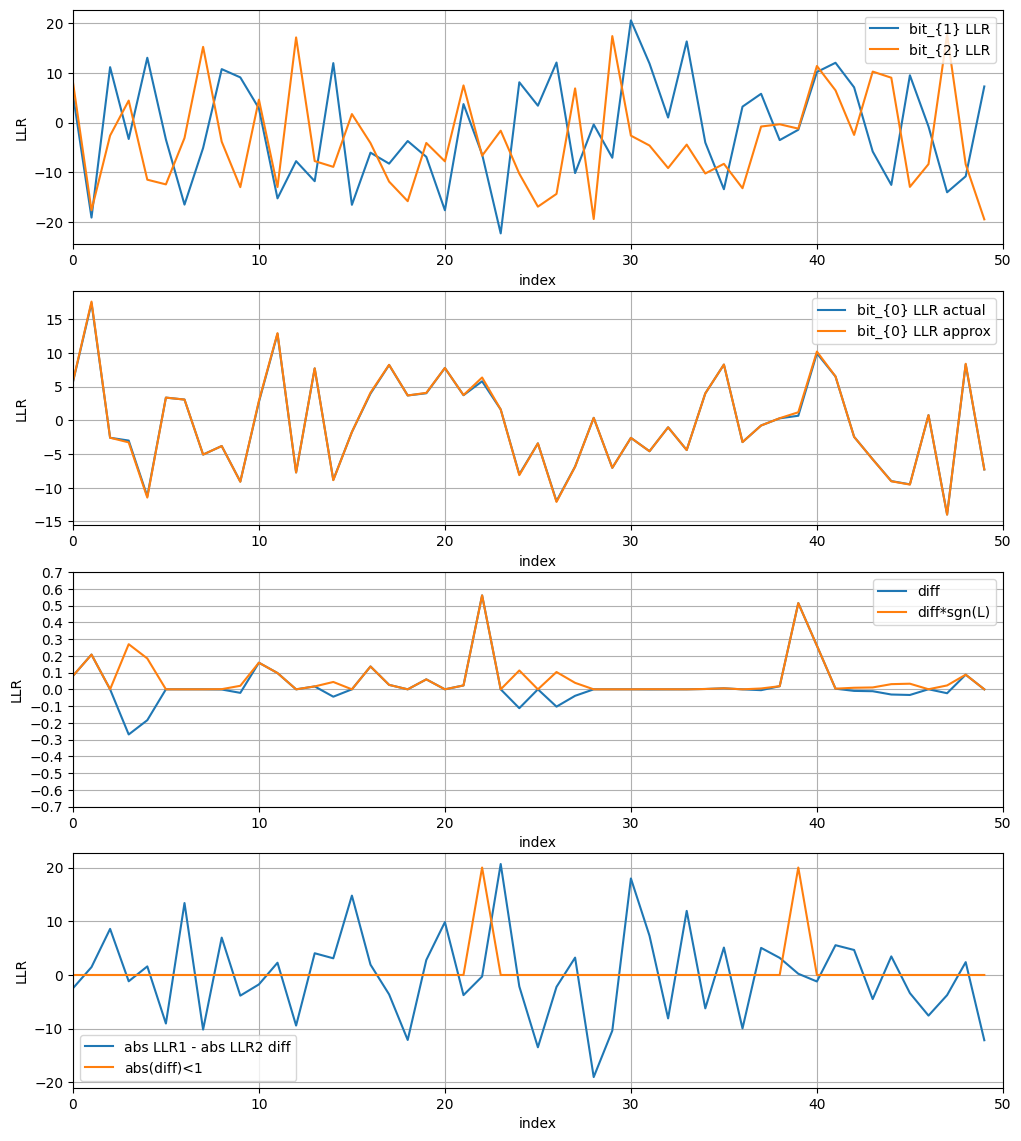

In [193]:
d0 = 1.
d1 = -1.
N = 0.5

bitnum = 100

y = np.random.choice([1,-1], size=(bitnum,), p=[1./2, 1./2])
n = np.sqrt(N)*np.random.normal(size=(bitnum,))

r = y + n


def LLR(r, d0, d1, N):
    return ((r-d1)**2 - (r-d0)**2)/N

def LLR_approx(LLR_b,LLR_c):
    if (not isinstance(LLR_b, (np.ndarray))):
        raise TypeError(f'LLR_approx(): first input was not a np.ndarray object.')
    if (not isinstance(LLR_c, (np.ndarray))):
        raise TypeError(f'LLR_approx(): second input was not a np.ndarray object.')
    
    if (len(LLR_b.shape)==1):
        xb = LLR_b.shape
        xc = LLR_c.shape
    else:
        xb, yb = LLR_b.shape
        xc, yc = LLR_c.shape
        if (yb != yc):
            raise ValueError(f'LLR_approx(): both input values have diff shape. (in 2nd dim: {yb}, {yc})')
    if (xb != xc):
        raise ValueError(f'LLR_approx(): both input values have diff shape. (in 1st dim: {xb}, {xc})')
    
    
    b = np.reshape(LLR_b, (-1,))
    c = np.reshape(LLR_c, (-1,))
    
    abs_b = np.abs(b)
    abs_c = np.abs(c)
    
    mag = np.min([abs_b, abs_c], axis=0)
    
    res = b/abs_b * c/abs_c * mag
    for idx, val in enumerate(res):
        if np.isnan(val):
            res[idx] = 0.
    return res

def LLR_actual(LLR_b, LLR_c):
    res = np.log(np.exp(LLR_b+LLR_c)+1)
    res = res - np.log(np.exp(LLR_b)+np.exp(LLR_c))
    return res

LLR_r = LLR(r, d0, d1, N)

LLR_r1 = LLR_r[:bitnum//2]
LLR_r2 = LLR_r[bitnum//2:]


L_actual = LLR_actual(LLR_r1,LLR_r2)
L_approx = LLR_approx(LLR_r1,LLR_r2)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,14))

plt.subplot(411)
plt.plot(range(bitnum//2), LLR_r1, label='bit_{1} LLR')
plt.plot(range(bitnum//2), LLR_r2, label='bit_{2} LLR')
plt.xlim([0,bitnum//2])
plt.grid('minor')
plt.xlabel('index')
plt.ylabel('LLR')
plt.legend()

plt.subplot(412)
plt.plot(range(bitnum//2), L_actual, label='bit_{0} LLR actual')
plt.plot(range(bitnum//2), L_approx, label='bit_{0} LLR approx')
plt.grid('minor')
plt.xlim([0,bitnum//2])
plt.xlabel('index')
plt.ylabel('LLR')
plt.legend()

plt.subplot(413)
plt.plot(range(bitnum//2), L_approx - L_actual, label='diff')
plt.plot(range(bitnum//2), L_actual/np.abs(L_actual)*(L_approx - L_actual), label='diff*sgn(L)')
plt.grid('minor')
plt.xlim([0,bitnum//2])
plt.xlabel('index')
plt.ylim([-0.7,0.7])
plt.yticks(np.arange(-0.7,0.71,0.1))
plt.ylabel('LLR')
plt.legend()

plt.subplot(414)
plt.plot(range(bitnum//2), abs(LLR_r1)-abs(LLR_r2), label='abs LLR1 - abs LLR2 diff')
plt.plot(range(bitnum//2), 20-20*(abs(abs(LLR_r1)-abs(LLR_r2))>1), label='abs(diff)<1')
plt.grid('minor')
plt.xlim([0,bitnum//2])
plt.xlabel('index')
plt.ylabel('LLR')
plt.legend()

print('Always over-estimates. (The magnitude becomes larger as abs() values differ less, at a maximum of log 2 = 0.69)')

We discussed $u_{0}=y_{0} \oplus y_{1}$ so that $L(u_{0})=\mathsf{sgn}(L(y_{0})) \mathsf{sgn}(L(y_{1})) \min(|L(y_{0})|,~|L(y_{1})|)$. We still need $L(u_{1})$. Again, note:


$$\begin{equation} \label{G2_all_cases_again}
X = 
\begin{bmatrix}
 0 & 0 \\
 0 & 1 \\
 1 & 0 \\
 1 & 1 \end{bmatrix}, ~~~~
Y = X G_{2} =
\begin{bmatrix}
 0 & 0 \\
 1 & 1 \\
 1 & 0 \\
 0 & 1 \end{bmatrix}
\end{equation}$$

Recall the repetition code soft decision. \
If $u_{0}=0$, $LR(\hat{u}_{1}) = LR(y_{0}) LR(y_{1})$. Thus, $LLR(\hat{u}_{1}) = LLR(y_{0}) + LLR(y_{1})$ in this case. \
If $u_{0}=1$, $LR(\hat{u}_{1}) = \left\{LR(y_{0})\right\}^{-1} LR(y_{1})$. Thus, $LLR(\hat{u}_{1}) = -LLR(y_{0}) + LLR(y_{1})$ in this case.

For example, if we received $\mathbb{r} = \begin{bmatrix}1.5 & -0.1\end{bmatrix}$, \
$LLR(\hat{u}_{0}) = (+1)(-1)(0.1) = -0.1$ \
Thus, $\hat{u}_{0}=1$. \
Then, $LLR(\hat{u}_{1}) = -LLR_{0} + LLR_{1} = \frac{-2.5^2 + 0.5^2 + 0.9^2 - 1.1^2}{N_{symbol}} < 0$, thus, $\hat{u}_{1} = 1$.

Note that we have the different output of $\hat{u}_{1}$ for the same received vector between a freezed bit and a free bit.

### Belief propagation, which node?

At last, we need to discuss <b>which</b> LLR of the node (bit) needs to be calculated. This is related to the frozen pattern and the permutation matrix.

Recall $G_{4} = \begin{bmatrix}G_{2} & \mathbb{0} \\ \mathbb{0} & G_{2} \end{bmatrix} \Pi \begin{bmatrix}G_{2} & \mathbb{0} \\ \mathbb{0} & G_{2} \end{bmatrix} \Pi$.

Where $\Pi$ is the permutation matrix, we can build $G_{8} = \begin{bmatrix}G_{4} & \mathbb{0} \\ \mathbb{0} & G_{4} \end{bmatrix} \Pi \begin{bmatrix}G_{4} & \mathbb{0} \\ \mathbb{0} & G_{4} \end{bmatrix} \Pi$.

In [136]:
perm8 = [[1,0,0,0,0,0,0,0],
         [0,1,0,0,0,0,0,0],
         [0,0,0,0,1,0,0,0],
         [0,0,0,0,0,1,0,0],
         [0,0,1,0,0,0,0,0],
         [0,0,0,1,0,0,0,0],
         [0,0,0,0,0,0,1,0],
         [0,0,0,0,0,0,0,1]]
perm8 = np.array(perm8)

G4_eye = np.zeros((8,8), dtype='int64')
G4_eye[0:4,0:4] = G4
G4_eye[4:8,4:8] = G4

G8_alt = np.matmul(np.matmul(np.matmul(G4_eye,perm8),G4_eye),perm8)
print(G4)
print(G8_alt)
G8 = kronecker_product(G4,G2)
print(G8)

print('The permutation matrix')
print(perm8)

perm16 = np.zeros((16,16), dtype='int64')
for i in range(4):
    perm16[i,i]=1
    perm16[i+4,i+8]=1
    perm16[i+8,i+4]=1
    perm16[i+12,i+12]=1

    
G8_eye = np.zeros((16,16), dtype='int64')
G8_eye[0:8,0:8] = G8
G8_eye[8:16,8:16] = G8
G16_alt = np.matmul(np.matmul(np.matmul(G8_eye,perm16),G8_eye),perm16)

print('G16:')
print(G16_alt)

[[1 0 0 0]
 [1 1 0 0]
 [1 0 1 0]
 [1 1 1 1]]
[[1 0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [2 1 2 1 0 0 0 0]
 [1 0 0 0 1 0 0 0]
 [2 1 0 0 2 1 0 0]
 [1 0 1 0 1 0 1 0]
 [2 1 2 1 2 1 2 1]]
[[1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 0 0 0 1 0 0 0]
 [1 1 0 0 1 1 0 0]
 [1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1]]
The permutation matrix
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]
G16:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0]
 [2 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0]
 [4 2 2 1 4 2 2 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 2 1 0 0 0 0 0 0]
 [2 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0]
 [4 2 2 1 0 0 0 0 4 2 2 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [2 1 0 0 2 1

One may notice that the permutation matrix also has the pattern of a $4\times4$ super-matrix of:
$$\begin{equation} \label{perm_mat}
\Pi = \begin{bmatrix}
\mathbb{I} & \mathbb{O} & \mathbb{O} & \mathbb{O} \\
\mathbb{O} & \mathbb{O} & \mathbb{I} & \mathbb{O} \\
\mathbb{O} & \mathbb{I} & \mathbb{O} & \mathbb{O} \\
\mathbb{O} & \mathbb{O} & \mathbb{O} & \mathbb{I} \end{bmatrix}
\end{equation}$$

The implementation is below.

In [158]:
def perm_N(N, dtype='int64'):
    if (np.log2(N) != np.log2(N)//1):
        raise ValueError(f'perm_N(): N is not power of 2. {N} was entered.')
    if (N<4):
        raise ValueError(f'perm_N(): N ({N}) was less than 4.')
    res = np.zeros((N,N),dtype=dtype)
    k = N//4
    for i in range(k):
        res[i,i]=1
        res[i+k,i+(k*2)]=1
        res[i+(k*2),i+k]=1
        res[i+(k*3),i+(k*3)]=1
    return res

# This function is not useful..
def G2_eye_N(N, dtype='int64'):
    if (np.log2(N) != np.log2(N)//1):
        raise ValueError(f'G2_eye_N(): N is not power of 2. {N} was entered.')
    if (N<4):
        raise ValueError(f'G2_eye_N(): N ({N}) was less than 4.')
    res = np.zeros((N,N),dtype=dtype)
    k = N//2
    G2 = np.array([[1,0],[1,1]], dtype=dtype)
    for i in range(k):
        res[i*2:(i+1)*2,i*2:(i+1)*2] = G2
    return res

print('perm_N(16):')
print(perm_N(16))

print('G2_eye_test')
print(G2_eye_N(16))

G16_alt_2 = np.matmul(np.matmul(np.matmul(G2_eye_N(16),perm_N(16)),G2_eye_N(16)),perm_N(16))

print(G16_alt_2)

perm_N(16):
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
G2_eye_test
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 

In [100]:
ex_bits = np.random.choice([0,1], size=(10,4), p=[1./2, 1./2])
print(ex_bits)

for i in ex_bits:
    print(i)

[[0 0 1 1]
 [0 0 0 1]
 [0 0 1 1]
 [1 0 1 1]
 [0 1 1 1]
 [1 1 0 1]
 [0 0 0 0]
 [0 1 0 1]
 [0 0 1 1]
 [1 0 0 1]]
[0 0 1 1]
[0 0 0 1]
[0 0 1 1]
[1 0 1 1]
[0 1 1 1]
[1 1 0 1]
[0 0 0 0]
[0 1 0 1]
[0 0 1 1]
[1 0 0 1]


In [96]:
print(np.random.choice([0, 1], size=(10,), p=[1./2, 1./2]))

n = np.random.normal(size=(1000,))

var = np.var(n)
print(var)

[1 0 1 0 0 1 1 0 0 0]
1.0313509997580177


In [83]:
from numpy.random import PCG64, SeedSequence

# High quality initial entropy
entropy = 0x87351080e25cb0fad77a44a3be03b491
sequences = [SeedSequence((entropy, worker_id)) for worker_id in range(12)]
generators = [PCG64(seq) for seq in sequences]

print(generators)
for i in range(10):
    print(generators[1].random_raw(2), generators[0].random_raw(2))
    print(type(generators[0].random_raw(2)))

[<numpy.random._pcg64.PCG64 object at 0x7f7f427a5fe0>, <numpy.random._pcg64.PCG64 object at 0x7f7f427a6560>, <numpy.random._pcg64.PCG64 object at 0x7f7f427a4bf0>, <numpy.random._pcg64.PCG64 object at 0x7f7f30c424b0>, <numpy.random._pcg64.PCG64 object at 0x7f7f427a7d70>, <numpy.random._pcg64.PCG64 object at 0x7f7f30c410c0>, <numpy.random._pcg64.PCG64 object at 0x7f7f30c43b60>, <numpy.random._pcg64.PCG64 object at 0x7f7f30c42610>, <numpy.random._pcg64.PCG64 object at 0x7f7f30ce5a60>, <numpy.random._pcg64.PCG64 object at 0x7f7f30ce57a0>, <numpy.random._pcg64.PCG64 object at 0x7f7f30ce59b0>, <numpy.random._pcg64.PCG64 object at 0x7f7f30ce7ed0>]
[7286901770351650085 4099166240344070972] [9890721268865449591 6797861328893102030]
<class 'numpy.ndarray'>
[5667536370404868404 3415605597442444269] [15116162999903618160  7217172450923815075]
<class 'numpy.ndarray'>
[10385173883572063708 11782414188612609708] [ 4154540429237877122 15890485393104097083]
<class 'numpy.ndarray'>
[ 6267287815416235757

<details>
    <summary> (These scripts were thrown) </summary>

$$\begin{equation} \label{eq-app1}
\begin{split}
LR(u_{0}) = & \frac{\Pr \left[ {u_{0}=0} \right]}{\Pr \left[ {u_{0}=1} \right]} \\
= &
\frac{\Pr \left[ {y_{0}=0} \right] \Pr \left[ {y_{1}=0} \right] +
\Pr \left[ {y_{0}=1} \right] \Pr \left[ {y_{1}=1} \right]}
{\Pr \left[ {y_{0}=0} \right] \Pr \left[ {y_{1}=1} \right] +
\Pr \left[ {y_{0}=1} \right] \Pr \left[ {y_{1}=0} \right]} \\
= &
\frac{\frac{\Pr \left[ {y_{0}=0} \right]}{\Pr \left[ {y_{0}=1} \right]}
\frac{\Pr \left[ {y_{1}=0} \right]}{\Pr \left[ {y_{1}=1} \right]} + 1}
{\frac{\Pr \left[ {y_{0}=0} \right]}{\Pr \left[ {y_{0}=1} \right]} +
\frac{\Pr \left[ {y_{1}=0} \right]}{\Pr \left[ {y_{1}=1} \right]}} \\
= &
\frac{LR(y_{0})LR(y_{1}) + 1}{LR(y_{0}) + LR(y_{1})} \\
= &
\frac{e^{LLR(y_{0})+LLR(y_{1})}+1}{e^{LLR(y_{0})}+e^{LLR(y_{1})}}
\end{split}
\end{equation}$$

Taking the log, we get:

$$\begin{equation} \label{eq-app2}
\begin{split}
LLR(u_{0}) = & ~ \log{(LR(y_{0})LR(y_{1})+1)} - \log{(LR(y_{0}) + LR(y_{1}))} \\
\simeq & ~ \log{(LR(y_{0})LR(y_{1}))} - \log{(LR(y_{0}) + LR(y_{1}))} \\
\simeq & ~ \log{(LR(y_{0}))} + \log{(LR(y_{1}))} - \log{\max(LR(y_{0}),LR(y_{1}))} \\
= & ~ \log{\min(LR(y_{0}),LR(y_{1}))} \\
= & ~ \min(LLR(y_{0}),LLR(y_{1}))
\end{split}
\end{equation}$$

In the first approximation, we neglected 1. This approximation is applicable when $LR(y_{0})LR(y_{1})\gg1$. In the second approximation, we neglected the smaller LR. This approximation was always applicable with the largest error of $\log 2$.

Assuming $LR(y_{0})LR(y_{1})\ll1$, we get:

$$\begin{equation} \label{eq-app3}
\begin{split}
LLR(u_{0}) = & ~ \log{(LR(y_{0})LR(y_{1})+1)} - \log{(LR(y_{0}) + LR(y_{1}))} \\
\simeq & ~ \log{(1)} - \log{(LR(y_{0}) + LR(y_{1}))} \\
\simeq & ~ - \log{\max(LR(y_{0}),LR(y_{1}))} \\
= & ~ - \max(LLR(y_{0}),LLR(y_{1}))
\end{split}
\end{equation}$$

Assuming $LR(y_{0})LR(y_{1})\simeq1$, we get:

$$\begin{equation} \label{eq-app4}
\begin{split}
LLR(u_{0}) = & ~ \log{(LR(y_{0})LR(y_{1})+1)} - \log{(LR(y_{0}) + LR(y_{1}))} \\
\simeq & ~ \log{(2)} - \log{(LR(y_{0}) + LR(y_{1}))} \\
\simeq & ~ \log{(2)} - \log{\max(LR(y_{0}),LR(y_{1}))} \\
\simeq & ~ - \max(LLR(y_{0}),LLR(y_{1}))
\end{split}
\end{equation}$$
    
Assuming $LR(y_{0}) \simeq LR(y_{1}) \gg 1$, we get:

$$\begin{equation} \label{eq-app5}
\begin{split}
LLR(u_{0}) = & ~ \log{(LR(y_{0})LR(y_{1})+1)} - \log{(LR(y_{0}) + LR(y_{1}))} \\
\simeq & ~ \log{LR(y_{0})^{2})} - \log{2LR(y_{0})} \\
= & ~ \log{LR(y_{0})} - \log{(2)}
\end{split}
\end{equation}$$
    
</details>